In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions_anisotropy import *

In [2]:
medium = load_medium_list()
randm = load_random_medium_list()

#0 isotropic
#1 taylor sandstone
#2 mesaverde clayshale
#3 mesaverde laminated siltstone
#4 mesaverde mudshale
#5 mesaverde calcareous sandstone
#6 quartz
 
#0 isotropic
#1 cubic
#2 VTI
#3 tetragonal
#4 trigonal
#5 orthorhombic
#6 monoclinic
#7 triclinic


In [3]:
C, density = get_specific_VTI(medium[1])
noise = 0.0 ### amplitude of perturbation
for i in range(0,6):
    for j in range(i,6):
        C[i,j] += noise*np.random.randn()*1e9
        C[j,i] = C[i,j]
print(C[:3,:3]*1e-9)
print(C[:3,3:]*1e-9)
print(C[3:,3:]*1e-9)        

taylor sandstone
[[34.5974432   9.34087365 10.61386654  0.          0.          0.        ]
 [ 9.34087365 34.5974432  10.61386654  0.          0.          0.        ]
 [10.61386654 10.61386654 28.35856     0.          0.          0.        ]
 [ 0.          0.          0.          8.3631025   0.          0.        ]
 [ 0.          0.          0.          0.          8.3631025   0.        ]
 [ 0.          0.          0.          0.          0.         12.62828478]]
[[34.5974432   9.34087365 10.61386654]
 [ 9.34087365 34.5974432  10.61386654]
 [10.61386654 10.61386654 28.35856   ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 8.3631025   0.          0.        ]
 [ 0.          8.3631025   0.        ]
 [ 0.          0.         12.62828478]]


[[34.5974432   9.37925908 10.57548111]
 [ 9.37925908 34.16729492 10.85588947]
 [10.57548111 10.85588947 28.30466241]]
[[ 0.21769461  0.          0.        ]
 [-1.19840847  0.          0.        ]
 [ 0.13149661  0.          0.        ]]
[[ 8.60512543  0.          0.        ]
 [ 0.          8.49171348 -0.72938913]
 [ 0.         -0.72938913 12.49967379]]
 
[[34.5974432   9.34087365 10.61386654]
 [ 9.34087365 34.5974432  10.61386654]
 [10.61386654 10.61386654 28.35856   ]]
[[-4.76837158e-16  0.00000000e+00  0.00000000e+00]
 [ 1.37090683e-15  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
[[8.36310250e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.36310250e+00 2.38418579e-16]
 [0.00000000e+00 2.38418579e-16 1.26282848e+01]]
 


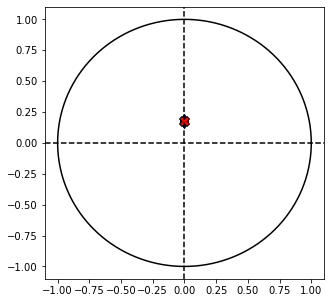

In [4]:
ang1 = 10.
ang2 = 0.
ang3 = 0.
C = rotate_C(C,1,ang1)
C = rotate_C(C,2,ang2)
C = rotate_C(C,3,ang3)
print(C[:3,:3]*1e-9)
print(C[:3,3:]*1e-9)
print(C[3:,3:]*1e-9)
print(' ')

d2r = np.pi/180.
c = np.zeros((3,3,3,3))
for i in range(0,3):
    for j in range(0,3):
        for k in range(0,3):
            for l in range(0,3):
                if i==j:
                    alpha = i
                elif (i==1 and j==2) or (i==2 and j==1):
                    alpha = 3
                elif (i==0 and j==2) or (i==2 and j==0):
                    alpha = 4
                elif (i==1 and j==0) or (i==0 and j==1):
                    alpha = 5
                if k==l:
                    beta = k
                elif (k==1 and l==2) or (k==2 and l==1):
                    beta = 3
                elif (k==0 and l==2) or (k==2 and l==0):
                    beta = 4
                elif (k==1 and l==0) or (k==0 and l==1):
                    beta = 5
                c[i,j,k,l] = C[alpha,beta]
Crot,g = getrotationVTI(C)
print(Crot[:3,:3]*1e-9)
print(Crot[:3,3:]*1e-9)
print(Crot[3:,3:]*1e-9)
print(' ')
est = np.dot(g.transpose(),np.array([0,0,1]))
real = np.zeros(3)
real[0] = -np.cos(-ang1*d2r)*np.sin(-ang2*d2r)*np.cos(-ang3*d2r)-np.sin(-ang1*d2r)*np.sin(-ang3*d2r)
real[1] = np.cos(-ang1*d2r)*np.sin(-ang2*d2r)*np.sin(-ang3*d2r)-np.sin(-ang1*d2r)*np.cos(-ang3*d2r)
real[2] = np.cos(-ang1*d2r)*np.cos(-ang2*d2r)
angles = np.linspace(0,2*np.pi,1000)
x = np.cos(angles)
y = np.sin(angles)
plt.figure(figsize=(5,5))
plt.scatter(est[0],est[1],100,color='blue',marker='d',edgecolors='k')
plt.scatter(real[0],real[1],100,marker='X',color='red',edgecolors='k')
plt.plot(x,y,color='black')
plt.axvline(0,color='black',ls='--')
plt.axhline(0,color='black',ls='--')
plt.show()

In [5]:
def getrotationVTI(C):
    c = np.zeros((3,3,3,3))
    for i in range(0,3):
        for j in range(0,3):
            for k in range(0,3):
                for l in range(0,3):
                    if i==j:
                        alpha = i
                    elif (i==1 and j==2) or (i==2 and j==1):
                        alpha = 3
                    elif (i==0 and j==2) or (i==2 and j==0):
                        alpha = 4
                    elif (i==1 and j==0) or (i==0 and j==1):
                        alpha = 5
                    if k==l:
                        beta = k
                    elif (k==1 and l==2) or (k==2 and l==1):
                        beta = 3
                    elif (k==0 and l==2) or (k==2 and l==0):
                        beta = 4
                    elif (k==1 and l==0) or (k==0 and l==1):
                        beta = 5
                    c[i,j,k,l] = C[alpha,beta]
                    
    
    v = np.zeros((3,3))
    for i in range(0,3):
        for j in range(0,3):
            for k in range(0,3):
                v[i,j] += c[k,i,k,j]
    vprime = v - 1./3 * np.trace(v)*np.identity(3)      

    w2,v2 = np.linalg.eigh(vprime)

    l = np.trace(vprime**3)/np.trace(vprime**2)*2

    ind2 = np.argmin([abs(w2[0]-l),abs(w2[1]-l),abs(w2[2]-l)])
    if ind2 == 0:
        ind21,ind22 = 1,2
    elif ind2 == 1:
        ind21,ind22 = 2,0
    else:
        ind21,ind22 = 0,1
        
    u2 = np.array([v2[:,ind22],v2[:,ind21],v2[:,ind2]])
    
    
    # apparently it's possible to use different ways to get the result, here i try all of them
    e = np.identity(3) 
    g2 = np.zeros((3,3))
    g21 = np.zeros((3,3))
    g22 = np.zeros((3,3))
    g23 = np.zeros((3,3))
    g24 = np.zeros((3,3))
    g25 = np.zeros((3,3))
   
    for i in range(0,3):
        for j in range(0,3):
            g2[i,j] = np.dot(u2[i,:],e[j,:])
    c2 = rotate_tensor_arbitrary_rot(c,g2)

    u2 = np.array([v2[:,ind21],v2[:,ind2],v2[:,ind22]])
    for i in range(0,3):
        for j in range(0,3):
            g21[i,j] = np.dot(u2[i,:],e[j,:])
    c21 = rotate_tensor_arbitrary_rot(c,g21)
    u2 = np.array([v2[:,ind2],v2[:,ind21],v2[:,ind22]])
    for i in range(0,3):
        for j in range(0,3):
            g22[i,j] = np.dot(u2[i,:],e[j,:])
    c22 = rotate_tensor_arbitrary_rot(c,g22)
    u2 = np.array([v2[:,ind21],v2[:,ind22],v2[:,ind2]])
    for i in range(0,3):
        for j in range(0,3):
            g23[i,j] = np.dot(u2[i,:],e[j,:])
    c23 = rotate_tensor_arbitrary_rot(c,g23)  
    
    u2 = np.array([v2[:,ind22],v2[:,ind2],v2[:,ind21]])
    for i in range(0,3):
        for j in range(0,3):
            g24[i,j] = np.dot(u2[i,:],e[j,:])        
    c24 = rotate_tensor_arbitrary_rot(c,g24)
    
    u2 = np.array([v2[:,ind2],v2[:,ind22],v2[:,ind21]])
    for i in range(0,3):
        for j in range(0,3):
            g25[i,j] = np.dot(u2[i,:],e[j,:])        
    c25 = rotate_tensor_arbitrary_rot(c,g25)
    
    # this is where i pick the best one. It has to be the one where C44 and C55 are closest together
    i = np.argmin([abs(c2[1,2,1,2]-c2[0,2,0,2]),abs(c21[1,2,1,2]-c21[0,2,0,2]),abs(c22[1,2,1,2]-c22[0,2,0,2]),
                   abs(c23[1,2,1,2]-c23[0,2,0,2]),abs(c24[1,2,1,2]-c24[0,2,0,2]),abs(c25[1,2,1,2]-c25[0,2,0,2])])
    if i==1:
        c2 = c21
        g2 = g21
    elif i==2:
        c2 = c22
        g2 = g22
    elif i==3:
        c2 = c23
        g2 = g23
    elif i==4:
        c2 = c24
        g2 = g24
    elif i==5:
        c2 = c25
        g2 = g25    
        
    C2 = np.zeros((6,6))
    for i in range(0,3):
        for j in range(0,3):
            for k in range(0,3):
                for l in range(0,3):
                    if i==j:
                        alpha = i
                    elif (i==1 and j==2) or (i==2 and j==1):
                        alpha = 3
                    elif (i==0 and j==2) or (i==2 and j==0):
                        alpha = 4
                    elif (i==1 and j==0) or (i==0 and j==1):
                        alpha = 5
                    if k==l:
                        beta = k
                    elif (k==1 and l==2) or (k==2 and l==1):
                        beta = 3
                    elif (k==0 and l==2) or (k==2 and l==0):
                        beta = 4
                    elif (k==1 and l==0) or (k==0 and l==1):
                        beta = 5
                    C2[alpha,beta] = c2[i,j,k,l]
    return C2, g2

def tensor_product(a,b):
    c1,c2 = np.shape(a)
    c3,c4 = np.shape(b)
    z = np.zeros((c1,c2,c3,c4))
    for i in range(0,c1):
        for j in range(0,c2):
            for k in range(0,c3):
                for l in range(0,c4):
                    z[i,j,k,l] = a[i,j]*b[k,l]
    return z

def tensor_product_bar(a,b):
    c1,c2 = np.shape(a)
    c3,c4 = np.shape(b)
    z = np.zeros((c1,c2,c3,c4))
    for i in range(0,c1):
        for j in range(0,c2):
            for k in range(0,c3):
                for l in range(0,c4):
                    z[i,j,k,l] = 1./2 * (a[i,k]*b[j,l]+a[i,l]*b[j,k]) 
    return z

def tensor_norm(a):
    c1,c2,c3,c4 = np.shape(a)
    z = 0
    for i in range(0,c1):
        for j in range(0,c2):
            for k in range(0,c3):
                for l in range(0,c4):
                    z += a[i,j,k,l]*a[i,j,k,l]
    return z     

def rotate_tensor_arbitrary_rot(c,r):
    cnew = np.zeros((3,3,3,3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    sum = 0.
                    for ii in range(3):
                        for jj in range(3):
                            for kk in range(3):
                                for ll in range(3):
                                    sum=sum+r[i,ii]*r[j,jj]*r[k,kk]*r[l,ll]*c[ii,jj,kk,ll]
                    cnew[i,j,k,l]=sum
    return cnew

### Reference 
a pre-print available at:
https://www.researchgate.net/publication/337966960_Recovering_the_normal_form_of_an_elasticity_tensor

Section 6.2 most relevant 